# Hotel Booking Data Analysis Project - Part 1

In [2]:
# Importing libraries

import numpy as np #for numerical computation
import pandas as pd #for data reading and manipulation
import matplotlib.pyplot as plt #to visualize data
import statistics as st
import seaborn as sns #to visualize data
from scipy.stats import kurtosis
from scipy.stats import norm #probability distribution function
from tabulate import tabulate #to print table
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data from existing .csv file using read_csv() of pandas module and storing into a dataframe
hotel_data = pd.read_csv("D:/Documents/NIIT/Course5/Sprint5/DS1_C5_S5_Hotel Dataset.csv")
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2092,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2093,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2094,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


## Task 1: Data Cleaning

In [4]:
# Printing the top 5 rows 
hotel_data.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


In [5]:
# Printing the bottom 5 rows
hotel_data.tail() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2091,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2092,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2093,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2094,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017
2095,City Hotel,0,135,2017,August,35,30,1,4,2,...,No Deposit,14.0,NaN,0,Transient,143.10,0,1,Check-Out,04-09-2017


In [6]:
# Printing a tuple with the details number of rows and columns 
print(hotel_data.shape) 

(2096, 32)


In [7]:
# Printing the information about the dataset
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2096 non-null   object 
 1   is_canceled                     2096 non-null   int64  
 2   lead_time                       2096 non-null   int64  
 3   arrival_date_year               2096 non-null   int64  
 4   arrival_date_month              2096 non-null   object 
 5   arrival_date_week_number        2096 non-null   int64  
 6   arrival_date_day_of_month       2096 non-null   int64  
 7   stays_in_weekend_nights         2096 non-null   int64  
 8   stays_in_week_nights            2096 non-null   int64  
 9   adults                          2096 non-null   int64  
 10  children                        2096 non-null   int64  
 11  babies                          2096 non-null   int64  
 12  meal                            20

In [8]:
# Counting missing values in each column
missing_values = hotel_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                         

In [9]:
#Separate the columns into categorical and numerical data types and display them.

def separate_columns(df):
    cat_cols = []
    num_cols = []
    
    for col in df.columns:
        if df[col].dtype == 'object':
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols

cat_cols, num_cols = separate_columns(hotel_data)

table = [cat_cols, num_cols]
print(tabulate({'Categorical': cat_cols, 'Numerical': num_cols}, headers = ['Categorical columns:', 'Numerical columns:']))

Categorical columns:     Numerical columns:
-----------------------  ------------------------------
hotel                    is_canceled
arrival_date_month       lead_time
meal                     arrival_date_year
country                  arrival_date_week_number
market_segment           arrival_date_day_of_month
distribution_channel     stays_in_weekend_nights
reserved_room_type       stays_in_week_nights
assigned_room_type       adults
deposit_type             children
customer_type            babies
reservation_status       is_repeated_guest
reservation_status_date  previous_cancellations
                         previous_bookings_not_canceled
                         booking_changes
                         agent
                         company
                         days_in_waiting_list
                         adr
                         required_car_parking_spaces
                         total_of_special_requests


In [10]:
# Grouping by manufacturer and replacing the missing values with mean for numerical columns
numerical_cols = hotel_data.select_dtypes(include=['float64', 'int64']).columns
hotel_data[numerical_cols] = hotel_data[numerical_cols].fillna(hotel_data[numerical_cols].mean())

# Replacing missing values in categorical columns with "Not Available"
categorical_cols = hotel_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    hotel_data[col] = hotel_data[col].fillna('Not Available')

# Counting missing values in each column after data preprocessing
missing_values = hotel_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                   

#### Interpretation- All data pre-processing and cleaning has been done.

## Task 2: Booking Pattern Analysis

### 1. What are the peak booking periods for the hotel?

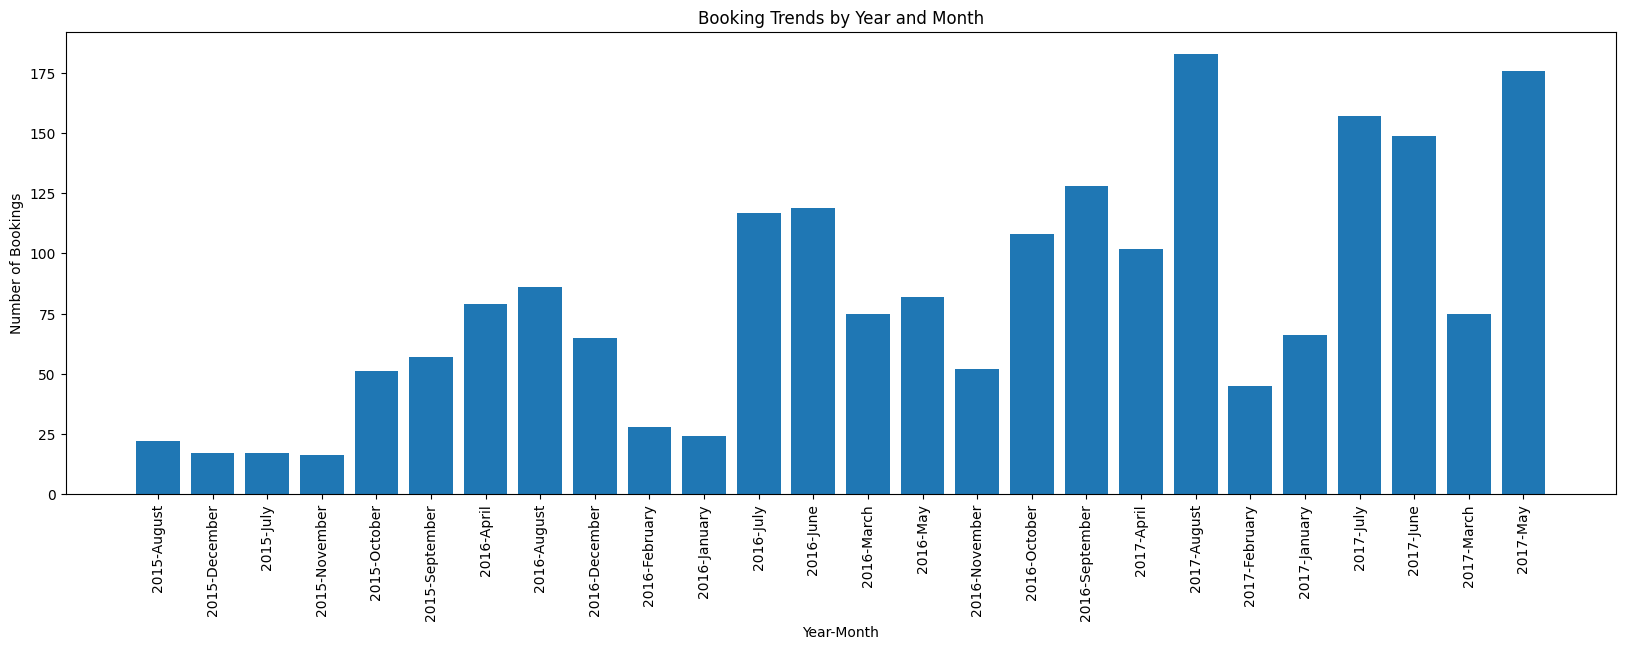

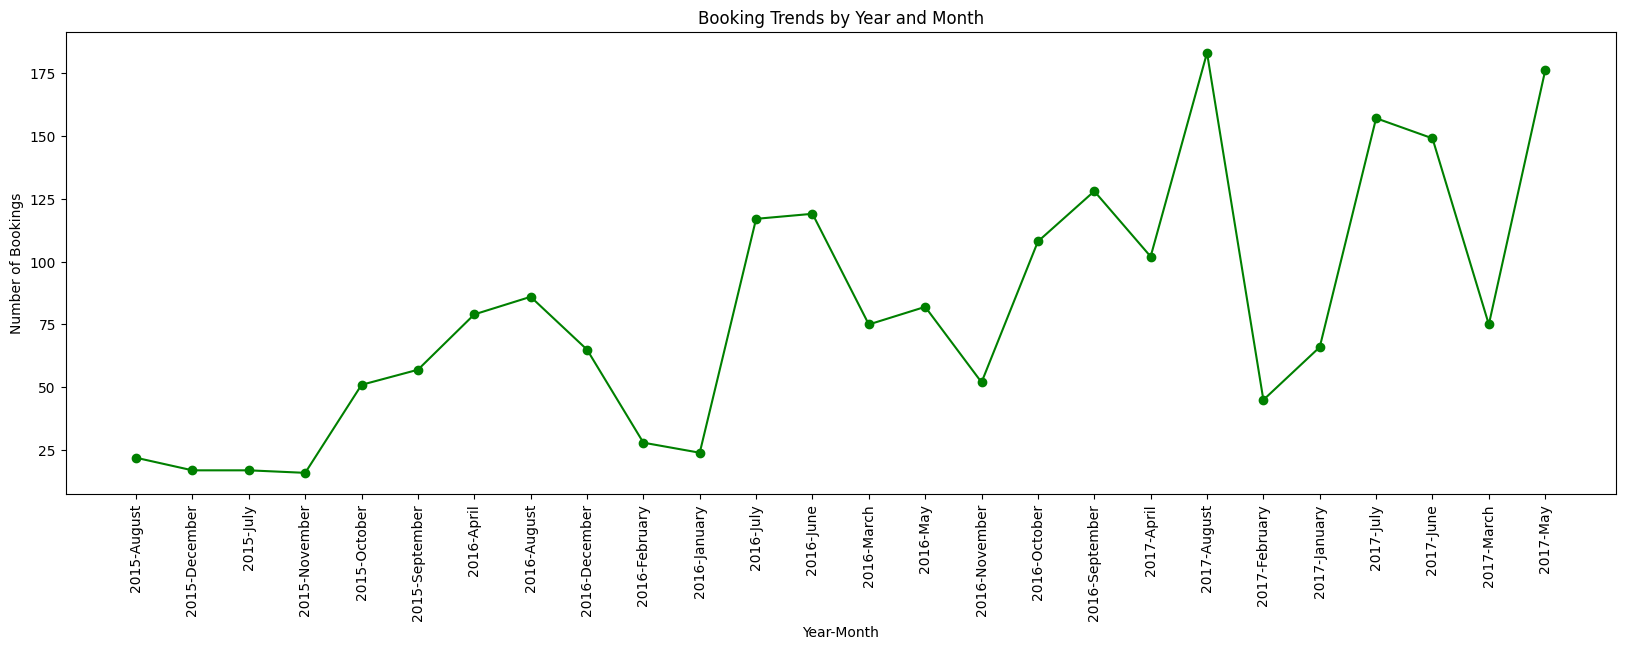

In [11]:
# Creating a combined label for the x-axis
hotel_data['Label'] = hotel_data['arrival_date_year'].astype(str) + '-' + hotel_data['arrival_date_month'].astype(str)

# Grouping by Label and count bookings, renaming the count column
hotel_data_grouped = (hotel_data.groupby('Label').size().to_frame(name='BookingCount').reset_index())  # Resetting index to include Label as a column

# Creating the bar graph
plt.figure(figsize=(20, 6))
plt.bar(hotel_data_grouped['Label'], hotel_data_grouped['BookingCount'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.title('Booking Trends by Year and Month')
plt.xticks(rotation=90)
plt.show()

# Creating the line chart
plt.figure(figsize=(20, 6))
plt.plot(hotel_data_grouped['Label'], hotel_data_grouped['BookingCount'], marker='o', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.title("Booking Trends by Year and Month")
plt.xticks(rotation=90)
plt.show()

#### Interpretation- Peak booking periods for the hotel are the summer months of May, June, July and August.

### 2. Is there a relationship between lead time and the likelihood of a booking being cancelled?

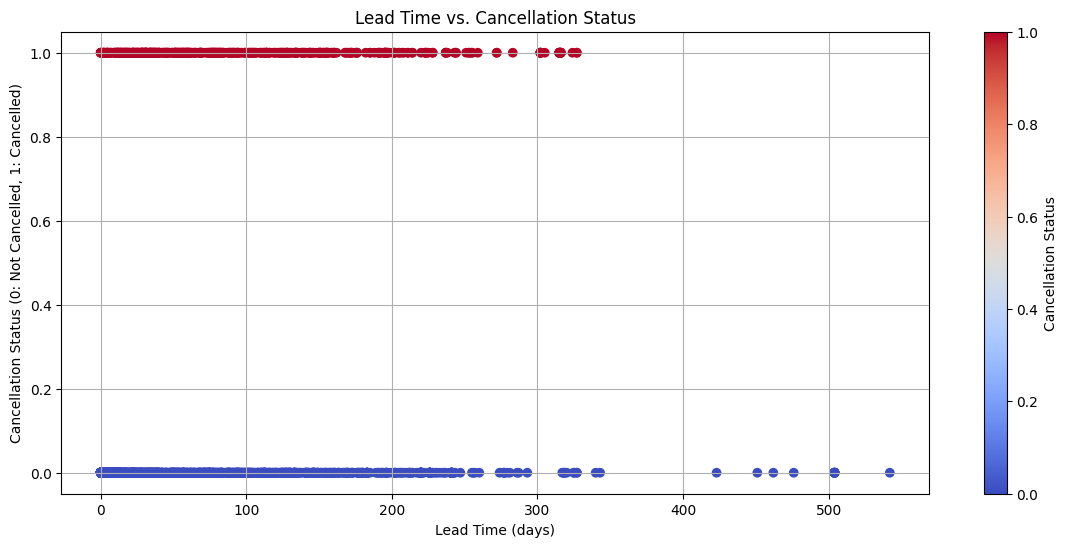

In [12]:
# Scatter plot with color-coded cancellation status
plt.figure(figsize=(14, 6))
plt.scatter(hotel_data["lead_time"], hotel_data["is_canceled"], c=hotel_data["is_canceled"], cmap="coolwarm")
plt.xlabel("Lead Time (days)")
plt.ylabel("Cancellation Status (0: Not Cancelled, 1: Cancelled)")
plt.title("Lead Time vs. Cancellation Status")
plt.colorbar(label="Cancellation Status")
plt.grid(True)
plt.show()

#### Interpretation- There is No Strong Correlation or any linear relationship between lead time and cancellation status. The majority of bookings with a lead time between 0 and 100 days are not canceled (blue dots). The data points are scattered, suggesting that lead time alone might not be a strong predictor of cancellations. We need to explore other variables that could influence cancellations, such as distribution channel, room type, average daily rate or guest demographics.

### 3. How do booking patterns vary by month, week, and day of the week?

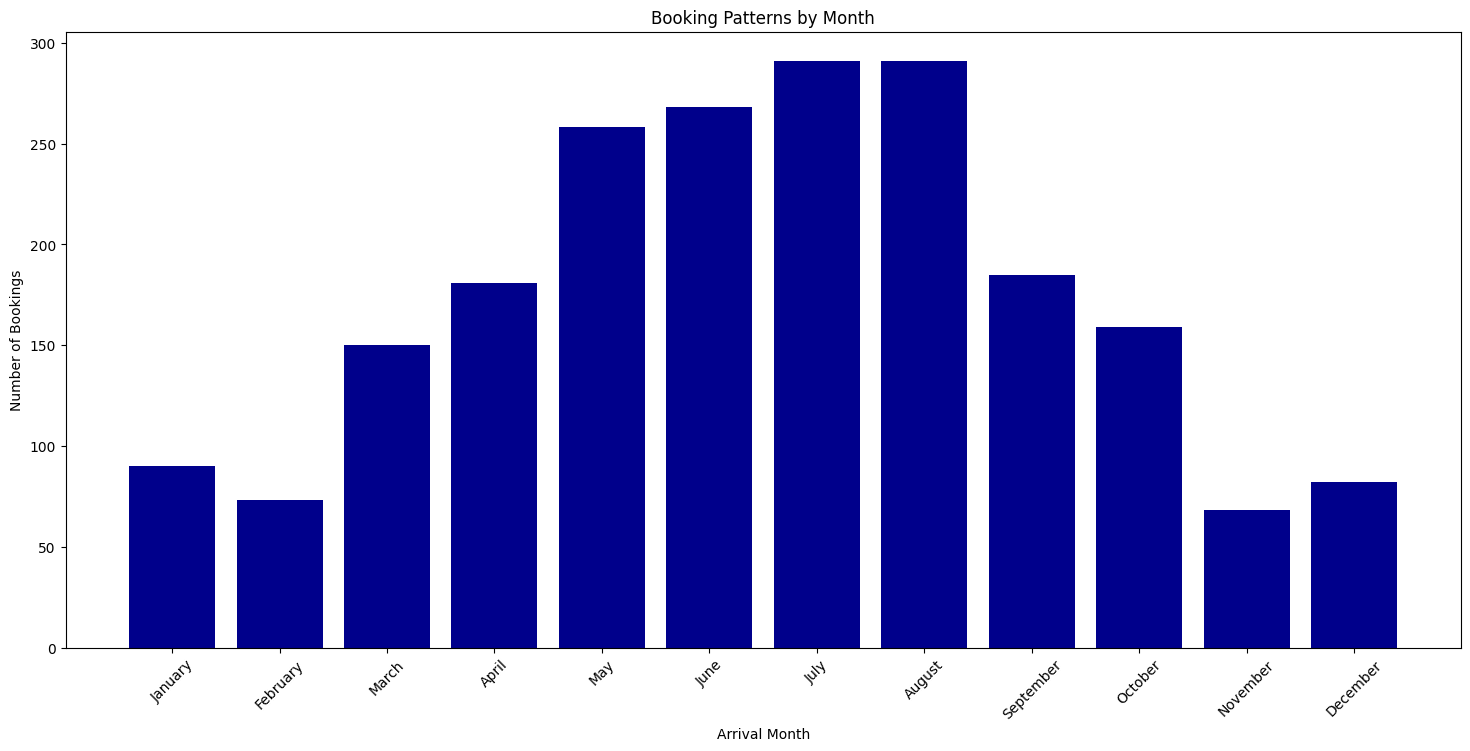

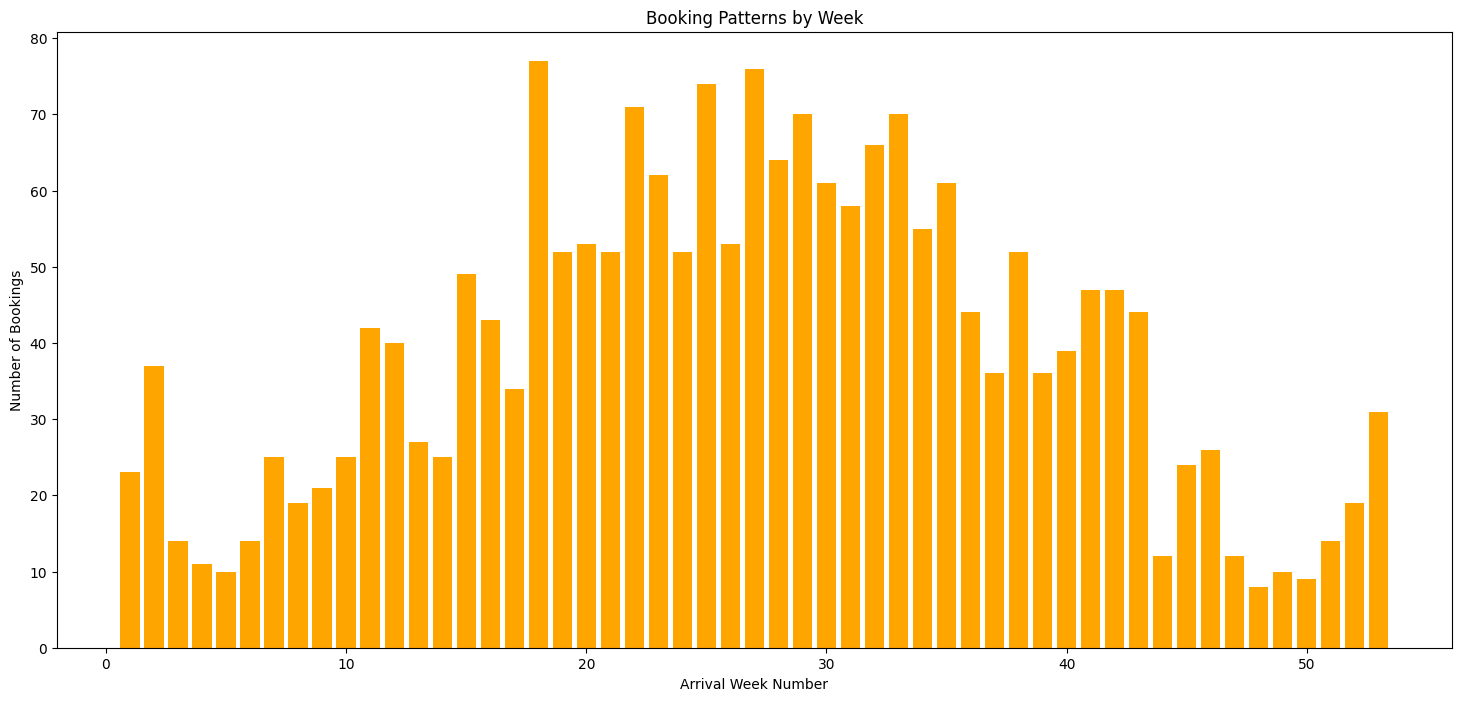

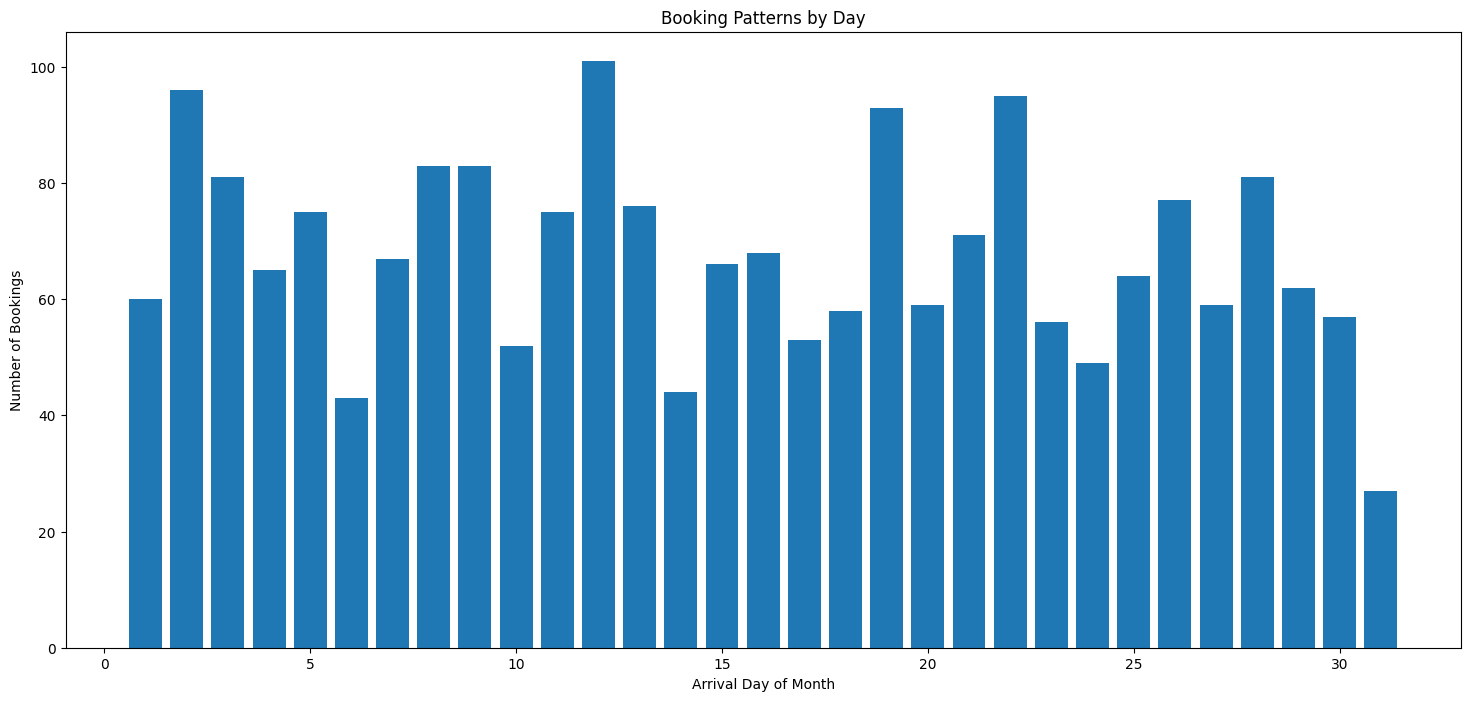

In [13]:
# Converting 'arrival_date_month' to a numeric representation
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_data['arrival_date_month_num'] = hotel_data['arrival_date_month'].map(month_map)

# Grouping and Counting bookings by Month
monthly_bookings = hotel_data.groupby('arrival_date_month_num').size().reset_index(name="BookingCount")

# Grouping and Counting bookings by Week
weekly_bookings = hotel_data.groupby('arrival_date_week_number').size().reset_index(name="BookingCount")

# Grouping and Counting bookings by Day
daily_bookings = hotel_data.groupby('arrival_date_day_of_month').size().reset_index(name="BookingCount")

# Month-wise Bar Graph
plt.figure(figsize=(18, 8))
plt.bar(monthly_bookings["arrival_date_month_num"], monthly_bookings["BookingCount"], color='darkblue')
plt.xlabel("Arrival Month")
plt.ylabel("Number of Bookings")
plt.title("Booking Patterns by Month")
plt.xticks(monthly_bookings['arrival_date_month_num'], month_map.keys(), rotation=45)  # Label x-axis with month names
plt.show()

# Week-wise Bar Graph
plt.figure(figsize=(18, 8))
plt.bar(weekly_bookings["arrival_date_week_number"], weekly_bookings["BookingCount"], color='orange')
plt.xlabel("Arrival Week Number")
plt.ylabel("Number of Bookings")
plt.title("Booking Patterns by Week")
plt.show()

# Day-wise Bar Graph
plt.figure(figsize=(18, 8))
plt.bar(daily_bookings["arrival_date_day_of_month"], daily_bookings["BookingCount"])
plt.xlabel("Arrival Day of Month")
plt.ylabel("Number of Bookings")
plt.title("Booking Patterns by Day")
plt.show()

#### Interpretation-
#### 1. The summer months of May, June, July and August have very high number of bookings and winter months of November, December, January and February have very low number of bookings.
#### 2. Week number 18 to 33 have higher number of bookings than usual.
#### 3. Dates 2, 12, 19, 22 of any month have high number of bookings than usual.

## Task 3: Booking Cancellation Analysis

### 1. What factors influence booking cancellations?

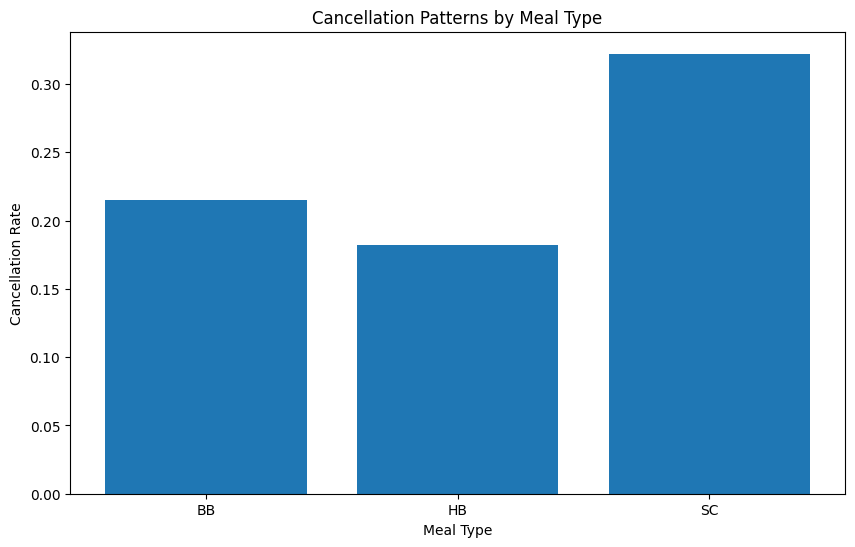

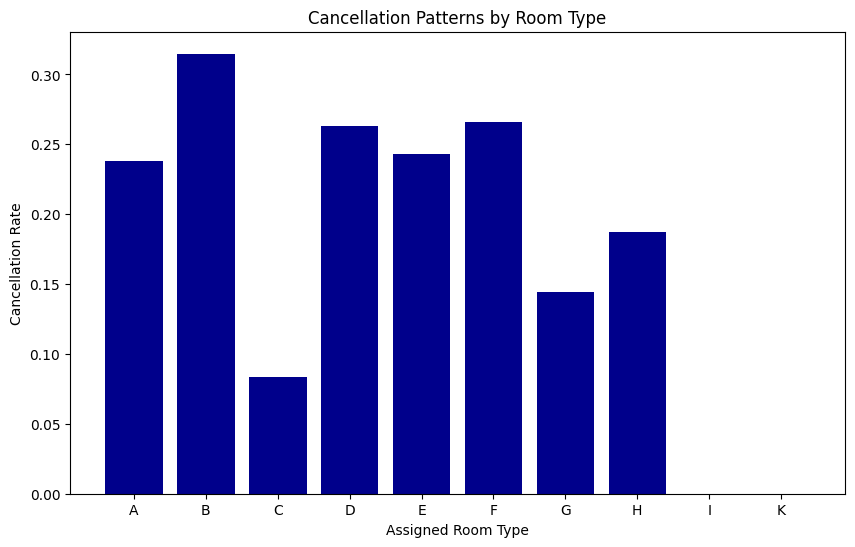

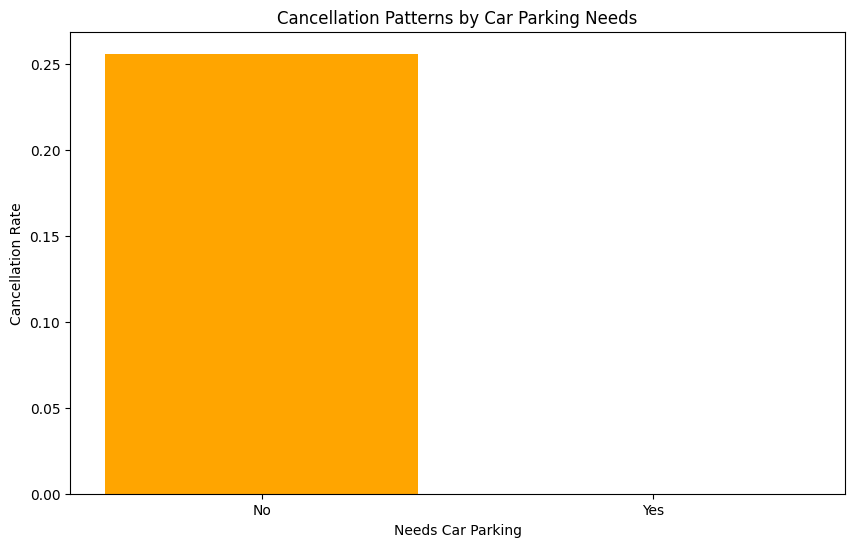

In [14]:
# Grouping and Analyzing Cancellation Patterns Based on Meal
meal_cancellations = hotel_data.groupby("meal").agg({"is_canceled": ["sum", "mean"]}).reset_index()
meal_cancellations.columns = ["meal", "total_cancellations", "cancellation_rate"]

plt.figure(figsize=(10, 6))
plt.bar(meal_cancellations["meal"], meal_cancellations["cancellation_rate"])
plt.xlabel("Meal Type")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Patterns by Meal Type")
plt.show()

# Grouping and Analyzing Cancellation Patterns Based on Assigned Room Type
room_type_cancellations = hotel_data.groupby("assigned_room_type").agg({"is_canceled": ["sum", "mean"]}).reset_index()
room_type_cancellations.columns = ["assigned_room_type", "total_cancellations", "cancellation_rate"]

plt.figure(figsize=(10, 6))
plt.bar(room_type_cancellations["assigned_room_type"], room_type_cancellations["cancellation_rate"], color='darkblue')
plt.xlabel("Assigned Room Type")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Patterns by Room Type")
plt.show()

# Grouping and Analyzing Cancellation Patterns Based on Required Car Parking Spaces
grouped_data = hotel_data.groupby("required_car_parking_spaces")

# Calculating cancellations (without resetting index)
cancellation_stats = grouped_data["is_canceled"].agg(["sum", "mean"])

# Creating new DataFrame with descriptive column names
parking_cancellations = cancellation_stats.reset_index()
parking_cancellations.columns = ["Needs Parking", "Total Cancellations", "Cancellation Rate"]

# Converting 'Needs Parking' to text labels (using the original column values)
parking_cancellations["Needs Parking"] = parking_cancellations["Needs Parking"].replace({0: "No", 1: "Yes"})

# Creating bar chart with adjusted labels
plt.figure(figsize=(10, 6))
plt.bar(parking_cancellations["Needs Parking"], parking_cancellations["Cancellation Rate"], color='orange')
plt.xlabel("Needs Car Parking")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Patterns by Car Parking Needs")
plt.xticks(rotation=0)
plt.show()

#### Interpretation-
#### 1. SC Meal Type leads to most number of cancellation of bookings.
#### 2. Assigned Room Type B has the highest cancellation rate.
#### 3. Bookings by customers needing car parking spaces are never cancelled. Around 25% of bookings which need car parking space get cancelled.

### 2. Are there specific trends or patterns in cancellations over time?

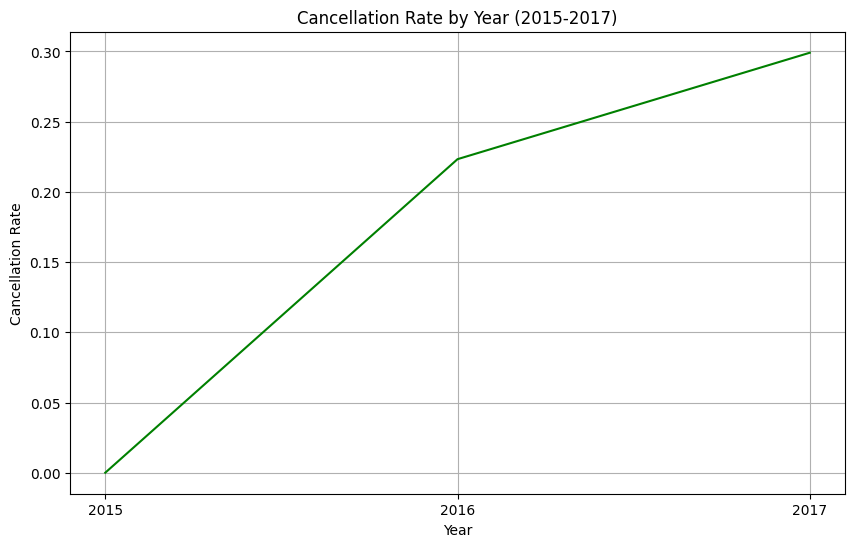

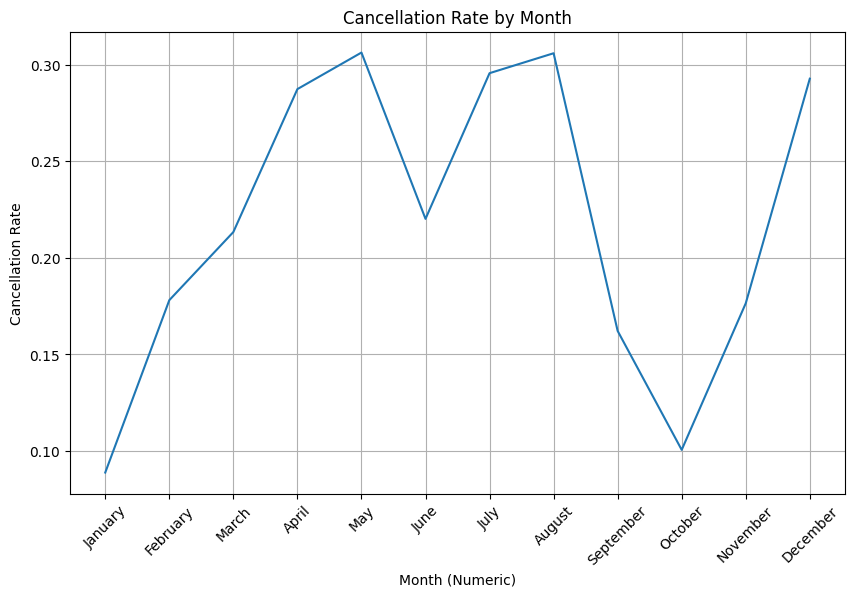

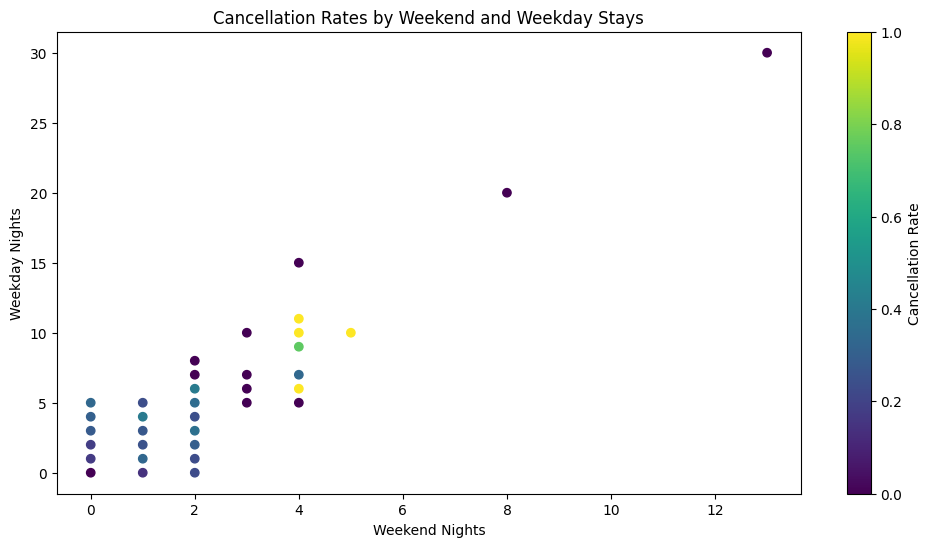

In [15]:
# Converting 'arrival_date_month' to a numeric representation
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_data['arrival_date_month_num'] = hotel_data['arrival_date_month'].map(month_map)

# Calculating cancellation rate by year
yearly_cancellation_rate = hotel_data.groupby('arrival_date_year')['is_canceled'].mean().reset_index()

# Plotting cancellation rate by year
plt.figure(figsize=(10, 6))
plt.plot(yearly_cancellation_rate['arrival_date_year'], yearly_cancellation_rate['is_canceled'], color='green')
plt.xlabel('Year')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Year (2015-2017)')
plt.xticks(yearly_cancellation_rate['arrival_date_year'])  # Set x-axis ticks to match the years
plt.grid(True)
plt.show()

# Calculating cancellation rate by month
monthly_cancellation_rate = hotel_data.groupby('arrival_date_month_num')['is_canceled'].mean().reset_index()

# Plotting cancellation rate by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellation_rate['arrival_date_month_num'], monthly_cancellation_rate['is_canceled'])
plt.xlabel('Month (Numeric)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Month')
plt.xticks(monthly_cancellation_rate['arrival_date_month_num'], month_map.keys(), rotation=45)  # Label x-axis with month names
plt.grid(True)
plt.show()

# Grouping by weekend and weekday stays
weekend_weekday_trends = hotel_data.groupby(['stays_in_weekend_nights', 'stays_in_week_nights'])['is_canceled'].mean().reset_index()

# Plotting weekend and weekday trends
plt.figure(figsize=(12, 6))
plt.scatter(weekend_weekday_trends['stays_in_weekend_nights'], weekend_weekday_trends['stays_in_week_nights'], c=weekend_weekday_trends['is_canceled'], cmap='viridis')
plt.colorbar(label='Cancellation Rate')
plt.xlabel('Weekend Nights')
plt.ylabel('Weekday Nights')
plt.title('Cancellation Rates by Weekend and Weekday Stays')
plt.show()

#### Interpretation-
#### 1. The booking cancellations have only grown over the years.
#### 2. The months of May and August have the highest booking cancellations.
#### 3. Cancellation ratio is less for lower number of days of stays and increases as the number of days of stay increases.

### 3. Can we identify high-risk bookings that are more likely to be canceled?

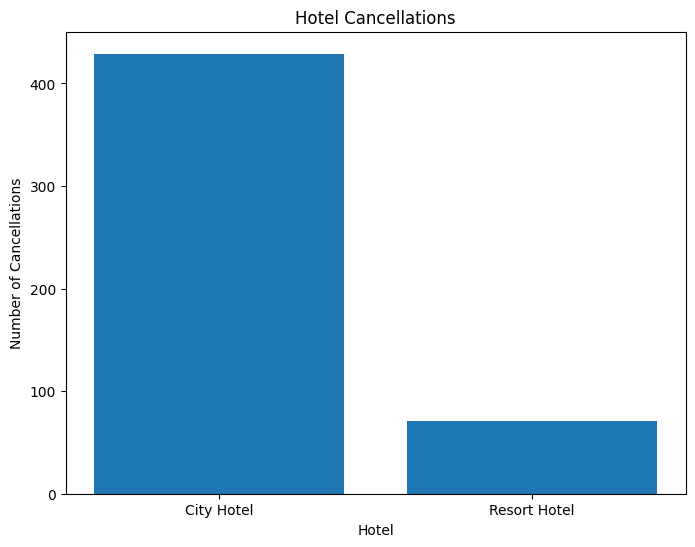

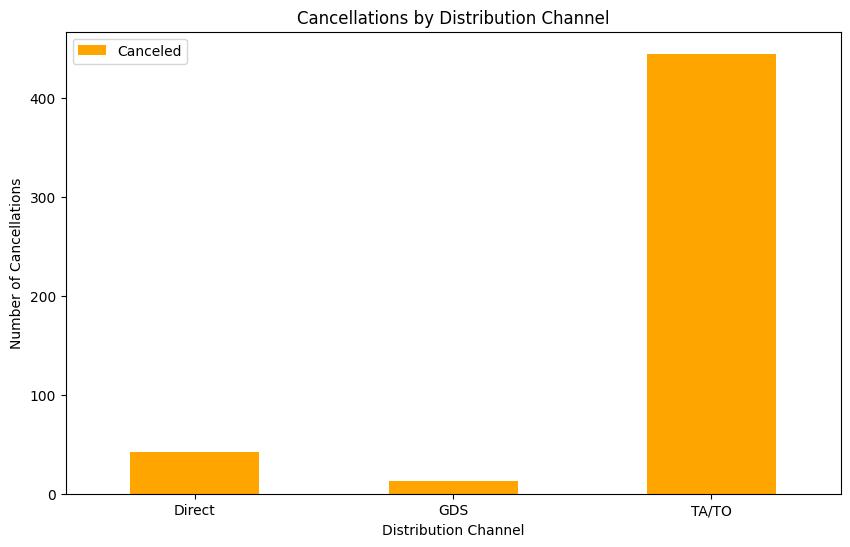

In [16]:
# Filtering for canceled bookings
canceled_bookings = hotel_data[hotel_data['is_canceled'] == 1]

# Counting hotels with canceled bookings
hotel_cancellations = canceled_bookings.groupby('hotel').size().reset_index(name='number_of_cancellations')

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(hotel_cancellations['hotel'], hotel_cancellations['number_of_cancellations'])
plt.xlabel('Hotel')
plt.ylabel('Number of Cancellations')
plt.title('Hotel Cancellations')
plt.show()

# Grouping by distribution channel and is_canceled
distribution_channel_cancellations = hotel_data.groupby(['distribution_channel', 'is_canceled']).size().reset_index(name='count')

# Filter for canceled bookings
distribution_channel_canceled = distribution_channel_cancellations[distribution_channel_cancellations['is_canceled'] == 1]

# Pivot the data for easier plotting
distribution_channel_pivot = distribution_channel_canceled.pivot(index='distribution_channel', columns='is_canceled', values='count')

# Plotting the bar graph
distribution_channel_pivot.plot(kind='bar', figsize=(10, 6), color='orange')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Cancellations')
plt.title('Cancellations by Distribution Channel')
plt.legend(['Canceled'])
plt.xticks(rotation=0)
plt.show()

#### Interpretation-
#### 1. City Hotels have more than 4 times booking cancellations than Resort Hotels.
#### 2. TA/TO Distribution Channel has the bulk of cancellations of bookings.

## Task 4: Customer Behavioral Segmentation

### 1. Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?

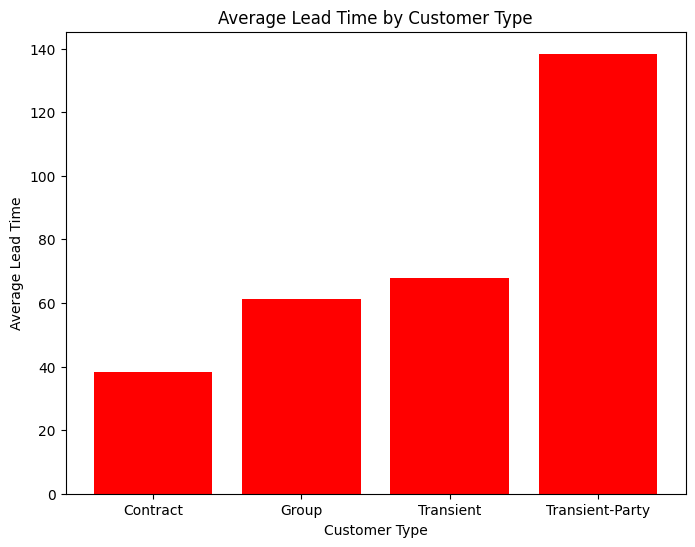

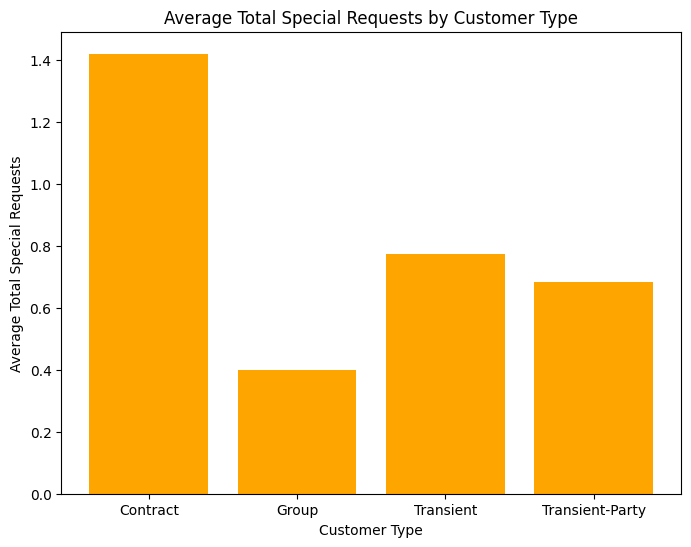

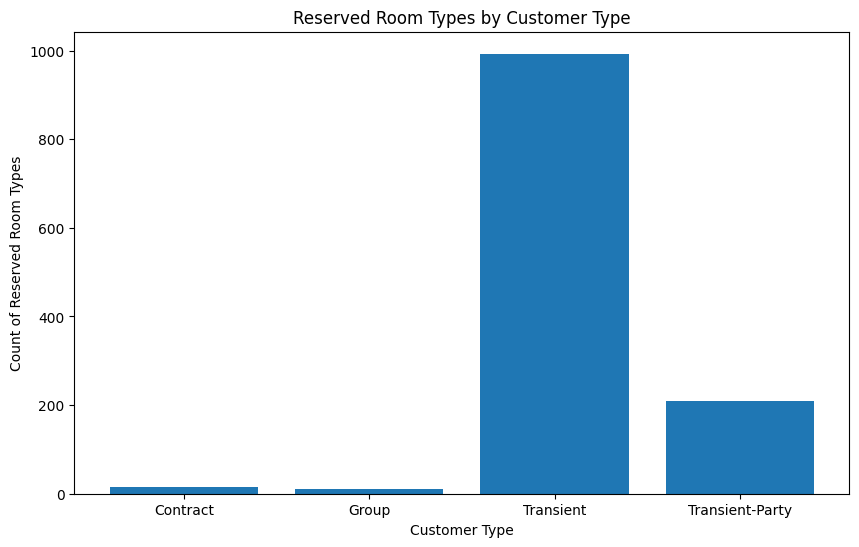

In [17]:
# Grouping by customer type and calculate average lead time
customer_type_lead_time = hotel_data.groupby('customer_type')['lead_time'].mean().reset_index()

# Grouping by customer type and calculate average total special requests
customer_type_special_requests = hotel_data.groupby('customer_type')['total_of_special_requests'].mean().reset_index()

# Grouping by customer type and count reserved room types
customer_type_room_types = hotel_data.groupby('customer_type')['reserved_room_type'].value_counts().reset_index(name='count')

# Visualize average lead time by customer type
plt.figure(figsize=(8, 6))
plt.bar(customer_type_lead_time['customer_type'], customer_type_lead_time['lead_time'], color='red')
plt.xlabel('Customer Type')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time by Customer Type')
plt.show()

# Visualize average total special requests by customer type
plt.figure(figsize=(8, 6))
plt.bar(customer_type_special_requests['customer_type'], customer_type_special_requests['total_of_special_requests'], color='orange')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Special Requests')
plt.title('Average Total Special Requests by Customer Type')
plt.show()

# Visualize reserved room type count by customer type
plt.figure(figsize=(10, 6))
plt.bar(customer_type_room_types['customer_type'], customer_type_room_types['count'])
plt.xlabel('Customer Type')
plt.ylabel('Count of Reserved Room Types')
plt.title('Reserved Room Types by Customer Type')
plt.show()

#### Interpretation-
#### 1. Transient-Party Customer Type has the highest average lead time.
#### 2. Contract Customer Type has the highest average total special requests.
#### 3. Transient Customer Type reserve the highest number of rooms.

### 2. Which marketing channels are the most effective for reaching specific customer segments?

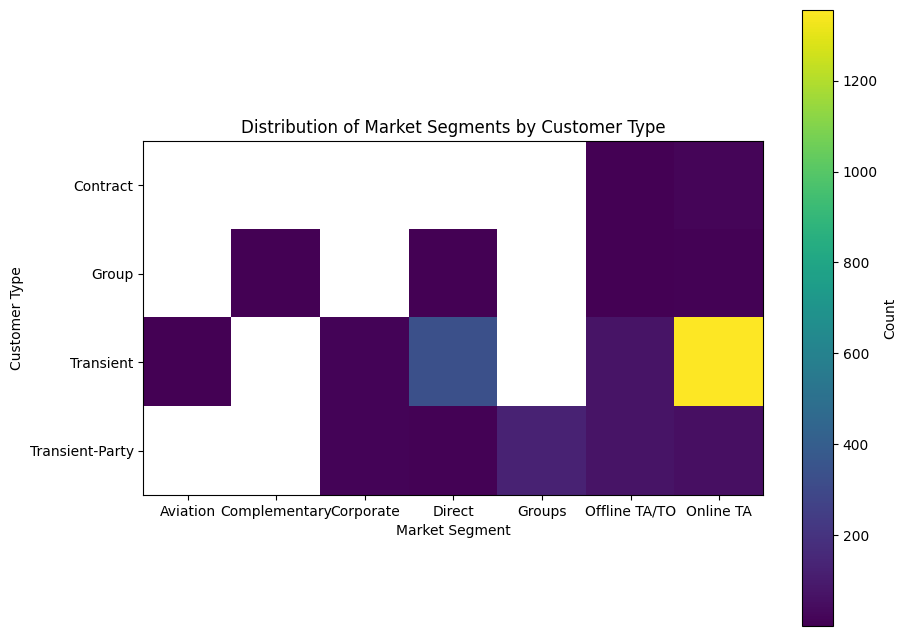

In [18]:
# Grouping by customer type and market segment
customer_segment_distribution = hotel_data.groupby(['customer_type', 'market_segment']).size().reset_index(name='count')

# Pivoting the data for easier visualization
customer_segment_pivot = customer_segment_distribution.pivot(index='customer_type', columns='market_segment', values='count')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(customer_segment_pivot, cmap='viridis', interpolation='nearest')
plt.xticks(range(len(customer_segment_pivot.columns)), customer_segment_pivot.columns)
plt.yticks(range(len(customer_segment_pivot.index)), customer_segment_pivot.index)
plt.colorbar(label='Count')
plt.xlabel('Market Segment')
plt.ylabel('Customer Type')
plt.title('Distribution of Market Segments by Customer Type')
plt.show()

#### Interpretation- 
#### 1. For the "Transient" customer type, "Online TA" is the dominant market segment, followed by "Direct." 
#### 2. For the "Group" customer type, "Aviation" and "Complementary" seem to be the most common market segments. 
#### 3. Contract customers are primarily from the "Corporate" and "Direct" market segments.

### 3. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?

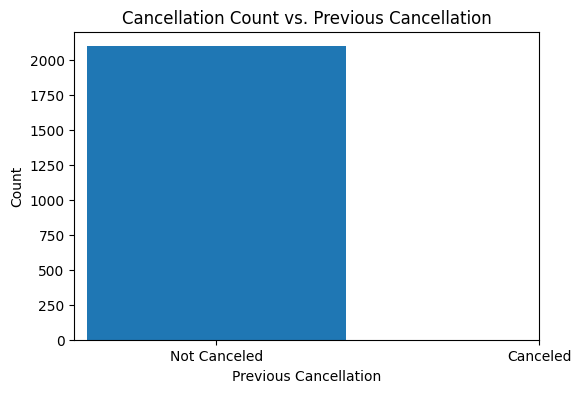

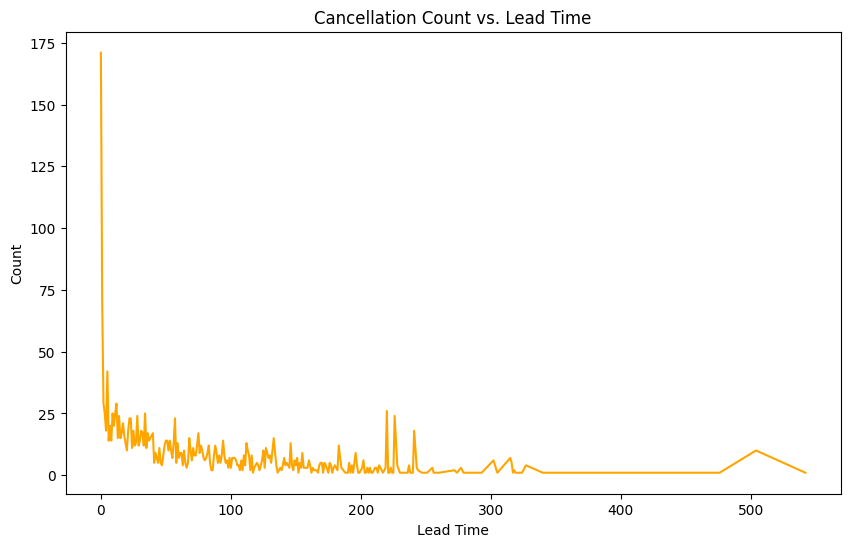

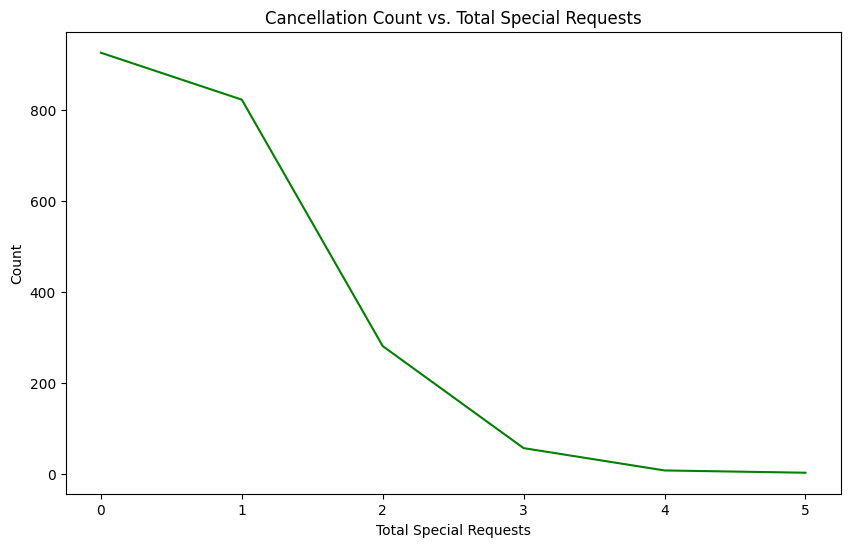

In [19]:
# Comparing cancellation count vs. previous cancellation
previous_cancellation_comparison = hotel_data.groupby('previous_cancellations')['is_canceled'].count().reset_index(name='count')

# Plotting the comparison
plt.figure(figsize=(6, 4))
plt.bar(previous_cancellation_comparison['previous_cancellations'], previous_cancellation_comparison['count'])
plt.xlabel('Previous Cancellation')
plt.ylabel('Count')
plt.title('Cancellation Count vs. Previous Cancellation')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# Comparing cancellation count vs. lead time
lead_time_comparison = hotel_data.groupby('lead_time')['is_canceled'].count().reset_index(name='count')

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.plot(lead_time_comparison['lead_time'], lead_time_comparison['count'], color='orange')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.title('Cancellation Count vs. Lead Time')
plt.show()

# Comparing cancellation count vs. total special requests
special_requests_comparison = hotel_data.groupby('total_of_special_requests')['is_canceled'].count().reset_index(name='count')

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.plot(special_requests_comparison['total_of_special_requests'], special_requests_comparison['count'], color='green')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.title('Cancellation Count vs. Total Special Requests')
plt.show()

#### Interpretation-
#### 1. There are no previous cancellations in the data. It means all the cancelled bookings haven't been cancelled before.
#### 2. General trend is that as the lead time increases, the cancellation numbers come down.
#### 3. The higher the number of total special requests, the lower is the cancellation count.

## Task 5: Revenue Management

### 1. How does the Average Daily Rate (ADR) vary over time?

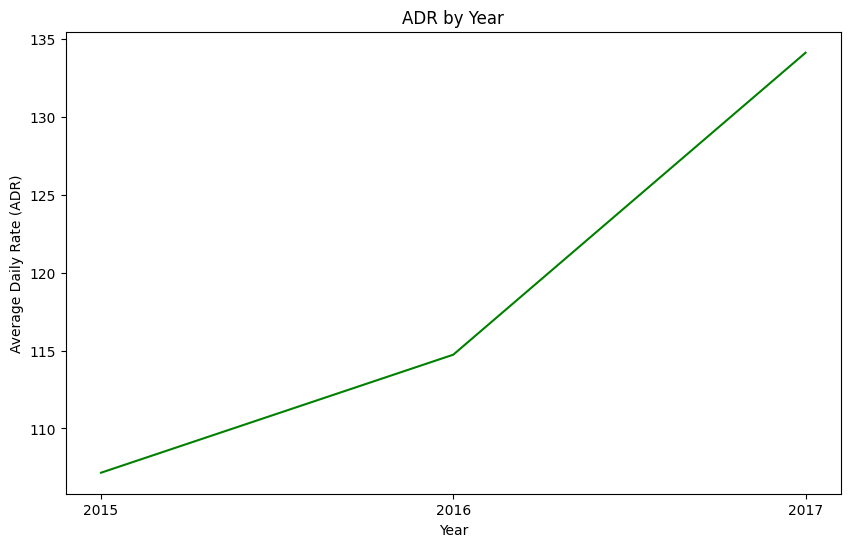

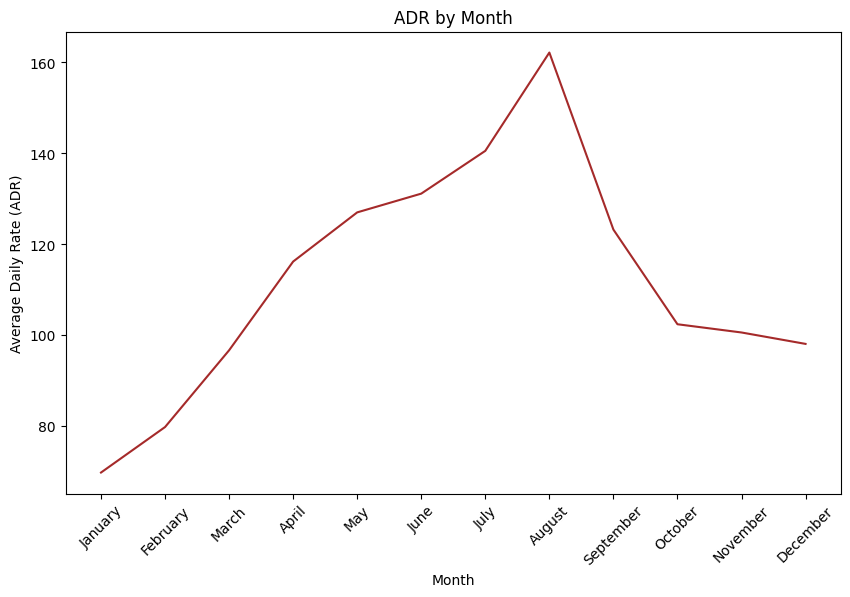

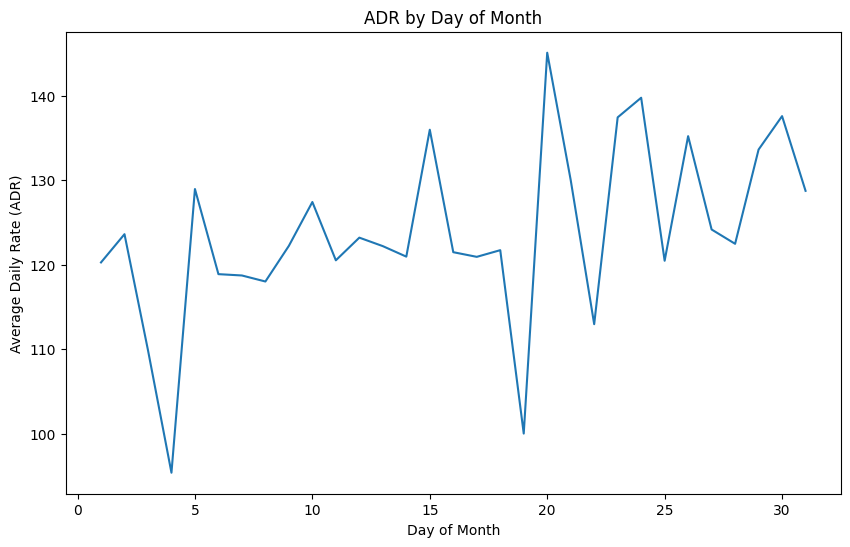

In [20]:
# Converting 'arrival_date_month' to a numeric representation
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_data['arrival_date_month_num'] = hotel_data['arrival_date_month'].map(month_map)

# Calculating ADR by year
adr_by_year = hotel_data.groupby('arrival_date_year')['adr'].mean().reset_index()

# Plotting ADR by year
plt.figure(figsize=(10, 6))
plt.plot(adr_by_year['arrival_date_year'], adr_by_year['adr'], color='green')
plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Year')
plt.xticks(adr_by_year['arrival_date_year'])  # Set x-axis ticks to match the years
plt.show()

# Calculating ADR by month
adr_by_month = hotel_data.groupby('arrival_date_month_num')['adr'].mean().reset_index()

# Plotting ADR by month
plt.figure(figsize=(10, 6))
plt.plot(adr_by_month['arrival_date_month_num'], adr_by_month['adr'], color='brown')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Month')
plt.xticks(adr_by_month['arrival_date_month_num'], month_map.keys(), rotation=45)  # Label x-axis with month names
plt.show()

# Calculating ADR by day of month
adr_by_day = hotel_data.groupby('arrival_date_day_of_month')['adr'].mean().reset_index()

# Plotting ADR by day of month
plt.figure(figsize=(10, 6))
plt.plot(adr_by_day['arrival_date_day_of_month'], adr_by_day['adr'])
plt.xlabel('Day of Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Day of Month')
plt.show()

#### Interpretation-
#### 1. Average Daily Rate has gone up significantly year on year.
#### 2. Average Daily Rate is the lowest in January, steadily increasing to the highest in August.
#### 3. General trend is that as the days of month go by, the Average Daily Rate increases gradually over the period of a month.

### 2. Can we identify pricing strategies that maximize revenue?

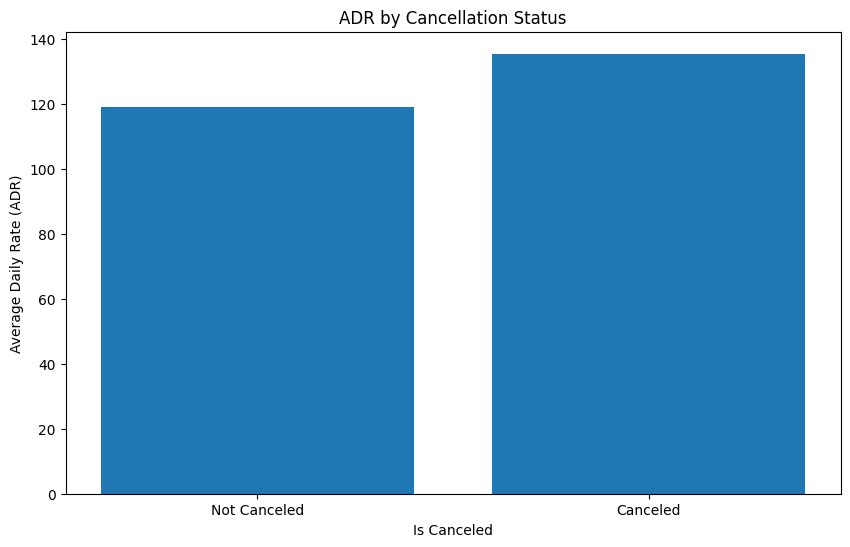

In [21]:
# Calculating ADR for canceled and non-canceled bookings
adr_by_cancellation = hotel_data.groupby('is_canceled')['adr'].mean().reset_index()

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(adr_by_cancellation['is_canceled'], adr_by_cancellation['adr'])
plt.xlabel('Is Canceled')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Cancellation Status')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

#### Interpretation- On average, canceled bookings have a higher ADR compared to non-canceled bookings. Hotels can increase adr for some segments or customer types depending on the demand season without impacting the cancellations.

### 3. Are there specific room types associated with higher ADR?

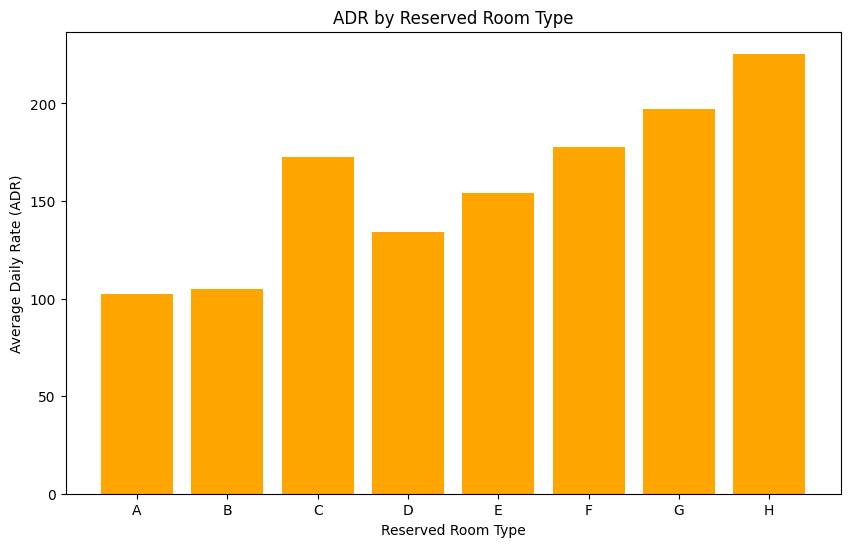

In [22]:
# Grouping by reserved_room_type and calculate average ADR
room_type_adr = hotel_data.groupby('reserved_room_type')['adr'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(room_type_adr['reserved_room_type'], room_type_adr['adr'], color='orange')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Reserved Room Type')
plt.show()

#### Interpretation- Reserved Room Types H, G, F, C are associated with higher average ADR.

## Task 6: Operational Efficiency

### 1. What is the effectiveness of different booking distribution channels?

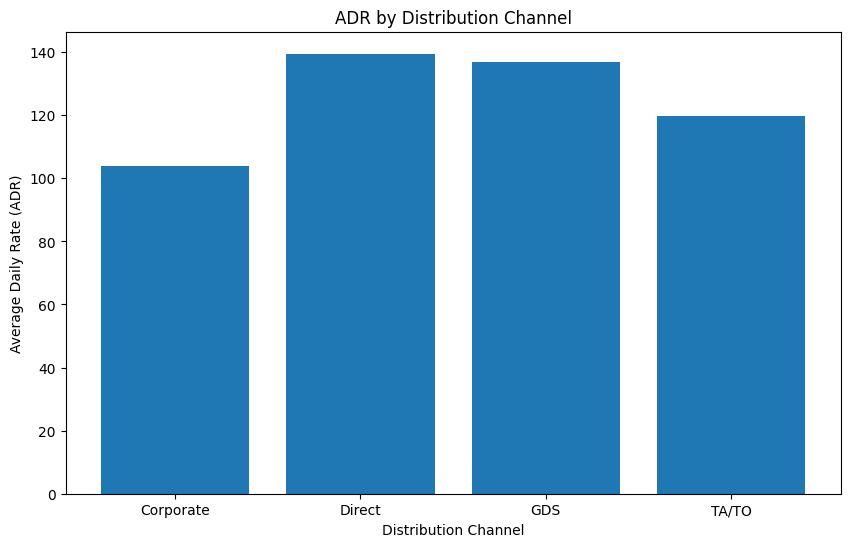

In [23]:
# Grouping by distribution channel and calculate average ADR
distribution_channel_adr = hotel_data.groupby('distribution_channel')['adr'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(distribution_channel_adr['distribution_channel'], distribution_channel_adr['adr'])
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Distribution Channel')
plt.show()

#### Interpretation- Direct and GDS Distribution Channel have higher average ADR.

### 2. How do booking changes impact hotel operations?

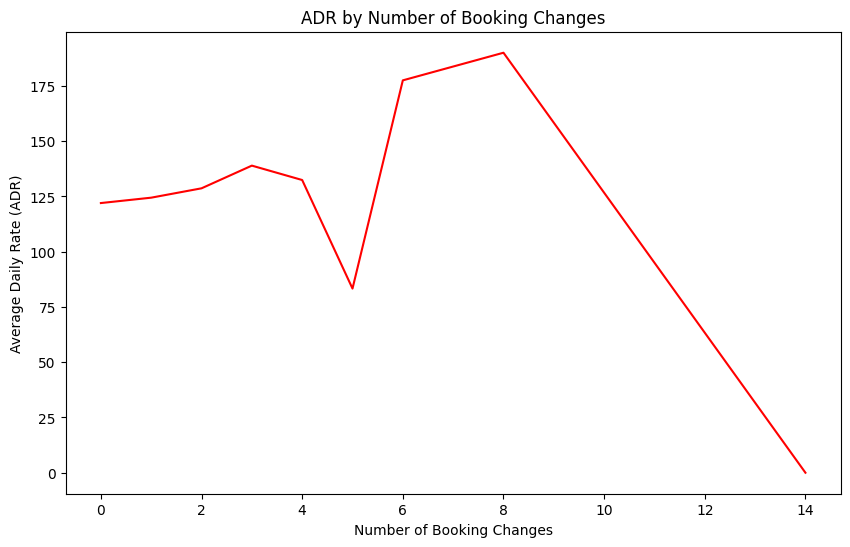

In [24]:
# Grouping by booking changes and calculate average ADR
booking_change_adr = hotel_data.groupby('booking_changes')['adr'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(booking_change_adr['booking_changes'], booking_change_adr['adr'], color='red')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Number of Booking Changes')
plt.show()

#### Interpretation- 
#### 1. As the number of booking changes increases from 0 to 8, the average daily rate (ADR) also tends to increase. This suggests that customers who make more changes to their bookings might be willing to pay higher prices. 
#### 2. After 8 booking changes, the ADR starts to decline. This could indicate that excessive changes might lead to lower rates or cancellations.

### 3. Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

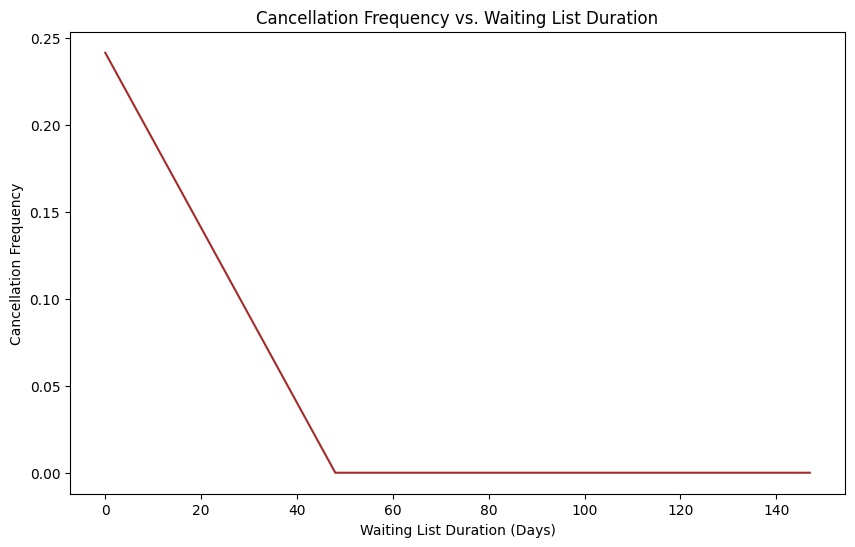

In [25]:
# Grouping by waiting list duration and calculate cancellation frequency
waiting_list_cancellation = hotel_data.groupby('days_in_waiting_list')['is_canceled'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(waiting_list_cancellation['days_in_waiting_list'], waiting_list_cancellation['is_canceled'], color='brown')
plt.xlabel('Waiting List Duration (Days)')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation Frequency vs. Waiting List Duration')
plt.show()

#### Interpretation- Bookings that remain on the waiting list for a short duration (up to 20 days) have a relatively high cancellation frequency. As the waiting list duration increases beyond 20 days, the cancellation frequency drops significantly and is 0 beyond 50 days.

## Task 7: Loyalty Programs and Repeat Business

### 1. What is the behavior of repeated guests with respect to their nature of stay?

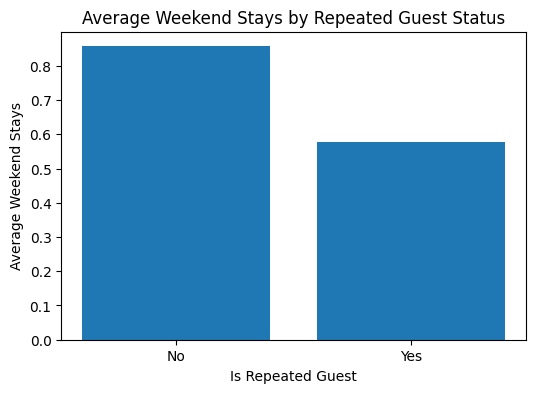

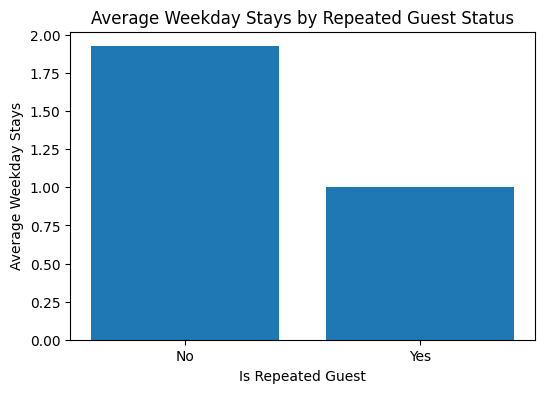

In [26]:
# Grouping by is_repeated_guest and calculate average stays
repeated_guest_stays = hotel_data.groupby('is_repeated_guest')[['stays_in_weekend_nights', 'stays_in_week_nights']].mean().reset_index()

# Plotting weekend stays
plt.figure(figsize=(6, 4))
plt.bar(repeated_guest_stays['is_repeated_guest'], repeated_guest_stays['stays_in_weekend_nights'])
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Weekend Stays')
plt.title('Average Weekend Stays by Repeated Guest Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Plotting weekday stays
plt.figure(figsize=(6, 4))
plt.bar(repeated_guest_stays['is_repeated_guest'], repeated_guest_stays['stays_in_week_nights'])
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Weekday Stays')
plt.title('Average Weekday Stays by Repeated Guest Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Interpretation- 
#### 1. First-time guests tend to stay longer than Repeated guests, both on weekends and weekdays.
#### 2. First-time guests have a significantly higher average number of weekdays nights compared to Repeated guests.
#### 3. While First-time guests stay longer on weekend, the difference is less pronounced compared to weekdays stays.

### 2. How does the success of loyalty programs relate to the accommodation of special requests from customers?

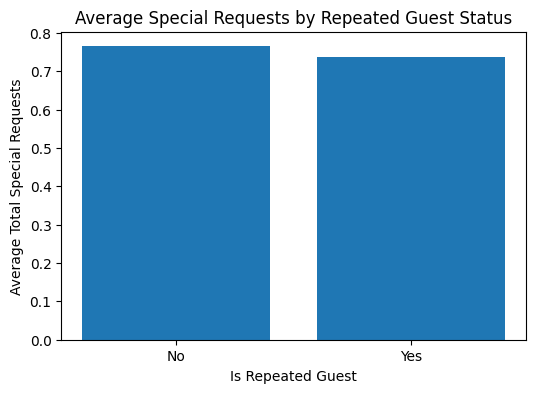

In [27]:
# Grouping by is_repeated_guest and calculate average total special requests
repeated_guest_special_requests = hotel_data.groupby('is_repeated_guest')['total_of_special_requests'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(6, 4))
plt.bar(repeated_guest_special_requests['is_repeated_guest'], repeated_guest_special_requests['total_of_special_requests'])
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Total Special Requests')
plt.title('Average Special Requests by Repeated Guest Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Interpretation- There is no significant difference in the average number of special requests between repeated guests and first-time guests.

### 3. What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

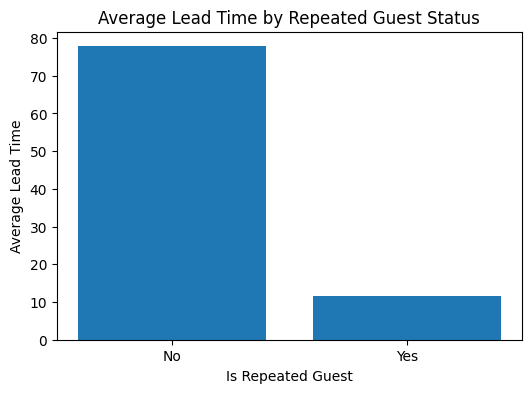

In [28]:
# Grouping by is_repeated_guest and calculate average lead time
repeated_guest_lead_time = hotel_data.groupby('is_repeated_guest')['lead_time'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(6, 4))
plt.bar(repeated_guest_lead_time['is_repeated_guest'], repeated_guest_lead_time['lead_time'])
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time by Repeated Guest Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Interpretation- First-time guests tend to book further in advance compared to repeated guests.

# Hotel Booking Data Analysis Project - Part 2

## Task 1: Customer Satisfaction

### 1. What is the distribution of the number and types of special requests made by guests?

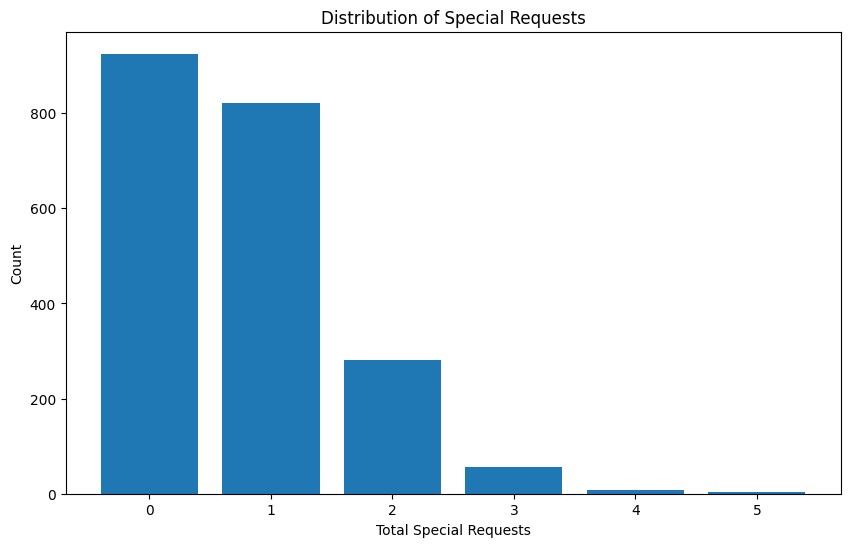

In [29]:
# Grouping by total_of_special_requests and count the number of occurrences
special_request_distribution = hotel_data['total_of_special_requests'].value_counts().reset_index(name='count')

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(special_request_distribution['total_of_special_requests'], special_request_distribution['count'])
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.title('Distribution of Special Requests')
plt.show()

#### Interpretation- Most of the guests make none or just 1 special requests.

### 2. Is there any relation between special requests made by customers and the average daily rate? Additionally, explore customer preferences and expectations for different room types.

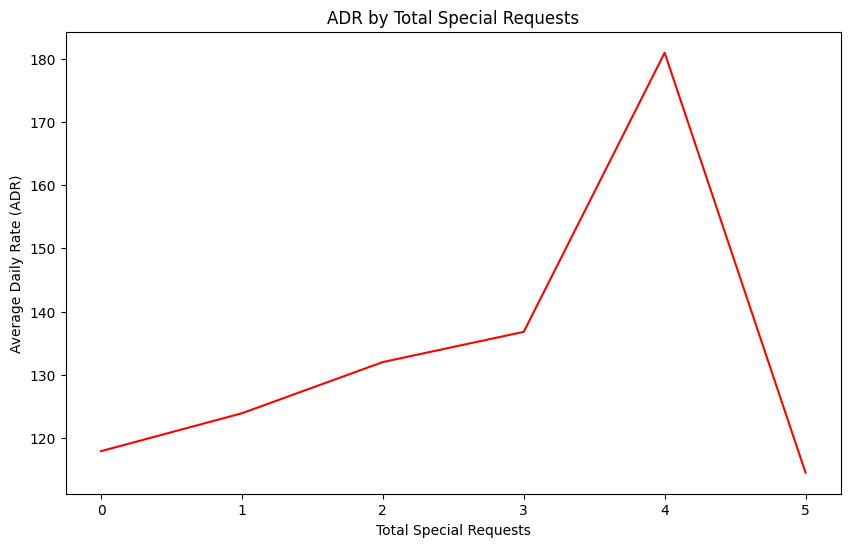

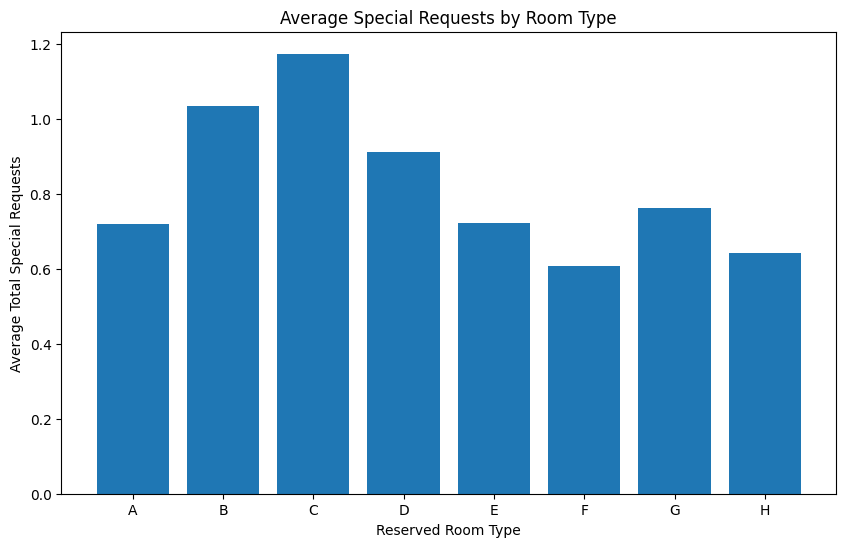

In [39]:
# Grouping by total_of_special_requests and calculate average ADR
special_request_adr = hotel_data.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(special_request_adr['total_of_special_requests'], special_request_adr['adr'], color='red')
plt.xlabel('Total Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Total Special Requests')
plt.show()

# Grouping by reserved_room_type and calculate average total special requests
room_type_special_requests = hotel_data.groupby('reserved_room_type')['total_of_special_requests'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(room_type_special_requests['reserved_room_type'], room_type_special_requests['total_of_special_requests'])
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Total Special Requests')
plt.title('Average Special Requests by Room Type')
plt.show()

#### Interpretation-
#### 1. ADR gradually increases upto 4 special requests and then drops sharply.
#### 2. Reserved Room Type C has the highest average total special requests, followed by B.

## Task 2: Marketing and Sales Optimization

### 1. Which marketing channels and market segments contribute the most to successful bookings?

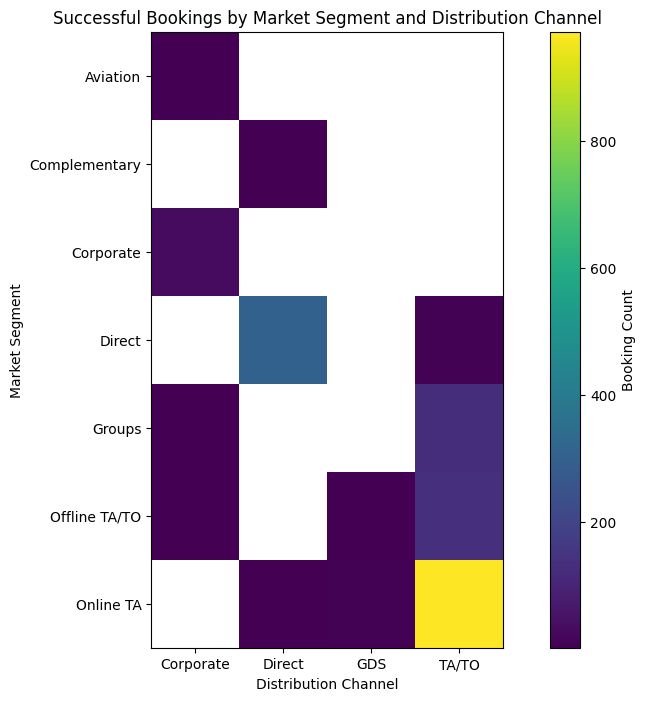

In [40]:
# Filtering for non-canceled bookings
successful_bookings = hotel_data[hotel_data['is_canceled'] == 0]

# Grouping by market segment and distribution channel
segment_channel_bookings = successful_bookings.groupby(['market_segment', 'distribution_channel']).size().reset_index(name='booking_count')

# Pivoting the data for easier visualization
segment_channel_pivot = segment_channel_bookings.pivot(index='market_segment', columns='distribution_channel', values='booking_count')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(segment_channel_pivot, cmap='viridis', interpolation='nearest')
plt.xticks(range(len(segment_channel_pivot.columns)), segment_channel_pivot.columns)
plt.yticks(range(len(segment_channel_pivot.index)), segment_channel_pivot.index)
plt.colorbar(label='Booking Count')
plt.xlabel('Distribution Channel')
plt.ylabel('Market Segment')
plt.title('Successful Bookings by Market Segment and Distribution Channel')
plt.show()

#### Interpretation- 
#### 1. Online TA Market Segment and TA/TO Distribution Channel seems to be the most dominant combination with highest successful booking counts.
#### 2. Direct Market Segment and Distribution Channel has high number of successful bookings too.

### 2. Which amenities or services have the highest impact on the average daily rate (ADR)? 

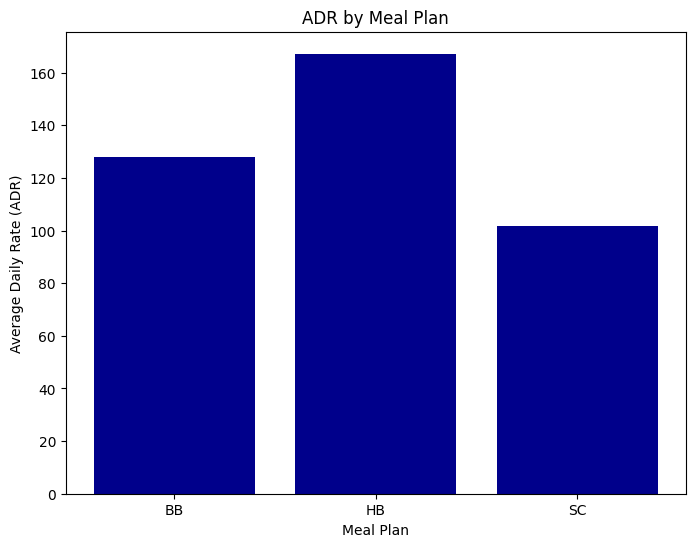

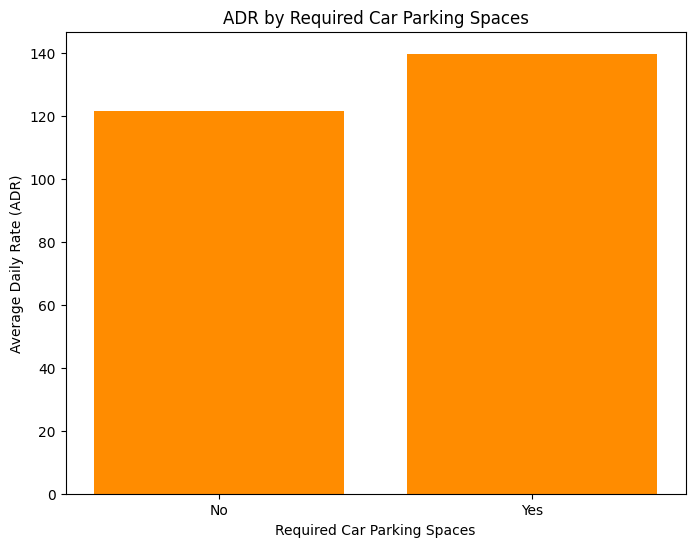

In [53]:
# Grouping by meal and calculate average ADR
meal_adr = hotel_data.groupby('meal')['adr'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(meal_adr['meal'], meal_adr['adr'], color='darkblue')
plt.xlabel('Meal Plan')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Meal Plan')
plt.show()

# Grouping by required_car_parking_spaces and calculate average ADR
parking_adr = hotel_data.groupby('required_car_parking_spaces')['adr'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(parking_adr['required_car_parking_spaces'], parking_adr['adr'], color='darkorange')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Required Car Parking Spaces')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Interpretation- 
#### 1. HB Meal has the highest average daily rate followed by BB Meal.
#### 2. Bookings which require car parking spaces command more average daily rate.

### 3. What is the distribution of bookings across various distribution channels?

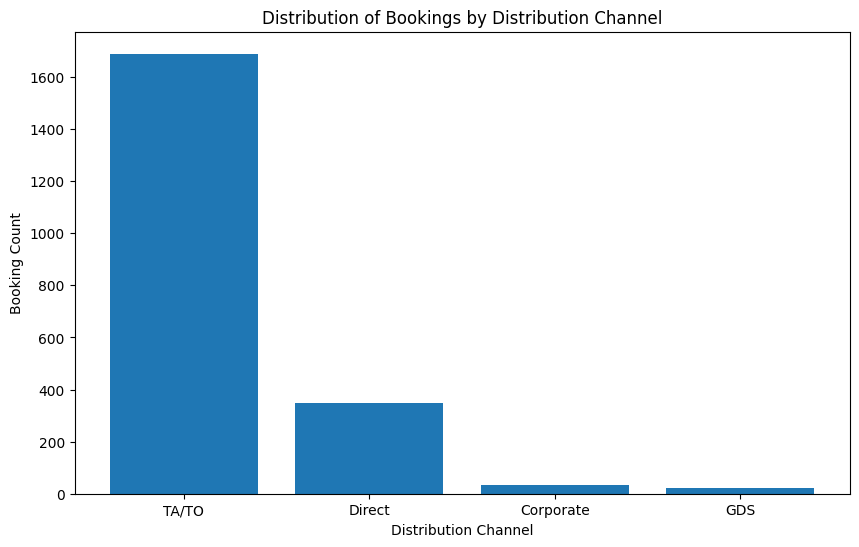

In [55]:
# Grouping by distribution channel and count the number of bookings
distribution_channel_counts = hotel_data['distribution_channel'].value_counts().reset_index(name='booking_count')

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(distribution_channel_counts['distribution_channel'], distribution_channel_counts['booking_count'])
plt.xlabel('Distribution Channel')
plt.ylabel('Booking Count')
plt.title('Distribution of Bookings by Distribution Channel')
plt.show()

#### Interpretation- TA/TO distribution channel has significantly higher booking count followed by Direct distribution channel. Corporate and GDS distribution channels have negligible bookings.

# Summary

1. The summer months of May, June, July and August have very high number of bookings and winter months of November, December, January and February have very low number of bookings.
2. Week number 18 to 33 have higher number of bookings than usual.
3. Dates 2, 12, 19, 22 of any month have high number of bookings than usual.
4. The booking cancellations have only grown over the years.
5. The months of May and August have the highest booking cancellations.
6. Cancellation ratio is less for lower number of days of stays and increases as the number of days of stay increases.
7. Bookings by customers needing car parking spaces are never cancelled. Around 25% of bookings which don't need car parking space get cancelled.
8. SC Meal Type leads to most number of cancellation of bookings.
9. Assigned Room Type B has the highest cancellation rate.
10. City Hotels have more than 4 times booking cancellations than Resort Hotels.
11. TA/TO Distribution Channel has the bulk of cancellations of bookings.
12. There are no previous cancellations in the data. It means all the cancelled bookings haven't been cancelled before.
13. General trend is that as the lead time increases, the cancellation numbers come down.
14. The higher the number of total special requests, the lower is the cancellation count.
15. No Strong Correlation between lead time and cancellation status. The majority of bookings with a lead time between 0 and 100 days are not canceled.
16. Transient-Party Customer Type has the highest average lead time.
17. Contract Customer Type has the highest average total special requests.
18. Transient Customer Type reserve the highest number of rooms.
19. For the "Transient" customer type, "Online TA" is the dominant market segment, followed by "Direct." 
20. For the "Group" customer type, "Aviation" and "Complementary" seem to be the most common market segments. 
21. Contract customers are primarily from the "Corporate" and "Direct" market segments.
22. Average Daily Rate has gone up significantly year on year.
23. Average Daily Rate is the lowest in January, steadily increasing to the highest in August.
24. General trend is that as the days of month go by, the Average Daily Rate increases gradually over the period of a month.
25. On average, canceled bookings have a higher ADR compared to non-canceled bookings.
26. Reserved Room Types H, G, F, C are associated with higher average ADR.
27. Direct and GDS Distribution Channel have higher average ADR.
28. As the number of booking changes increases from 0 to 8, the average daily rate (ADR) also tends to increase. After 8 booking changes, the ADR starts to decline.
29. ADR gradually increases upto 4 special requests and then drops sharply.
30. First-time guests tend to stay longer than Repeated guests, both on weekends and weekdays.
31. While First-time guests stay longer on weekend, the difference is less pronounced compared to weekdays stays.
32. There is no significant difference in the average number of special requests between repeated guests and first-time guests.
33. First-time guests tend to book further in advance compared to repeated guests.
34. Most of the guests make none or just 1 special requests.
35. Reserved Room Type C has the highest average total special requests, followed by B.
36. Online TA Market Segment and TA/TO Distribution Channel seems to be the most dominant combination with highest successful booking counts.
37. Direct Market Segment and Distribution Channel has high number of successful bookings too.
38. HB Meal has the highest average daily rate followed by BB Meal.
39. Bookings which require car parking spaces command more average daily rate.
40. TA/TO distribution channel has significantly higher booking count followed by Direct distribution channel. Corporate and GDS distribution channels have negligible bookings.
41. Bookings that remain on the waiting list for a short duration (up to 20 days) have a relatively high cancellation frequency. As the waiting list duration increases beyond 20 days, the cancellation frequency drops significantly and is 0 beyond 50 days.

# Business Conclusions

1. Seasonal Trends and Booking Patterns
    1. Peak Seasons: Summer months (May-August) experience high demand, while winter months (November-February) see lower bookings.
    2. Weekly Patterns: Weeks 18-33 witness above-average bookings.
    3. Specific Dates: Days 2, 12, 19, and 22 of any month tend to have higher bookings.
2. Cancellation Patterns
    1. Increasing Cancellations: Cancellation rates have risen over time.
    2. Summer Months: May and August have the highest cancellation rates.
    3. Stay Duration: Shorter stays have lower cancellation rates, while longer stays see higher cancellations.
    4. Car Parking: Bookings requiring car parking spaces have lower cancellation rates, with around 25% cancellations.
    5. Meal Type: SC Meal Type is associated with higher cancellations.
    6. Room Type: Room Type B has the highest cancellation rate.
3. Customer Behavior and Preferences
    1. Repeated Guests: Repeated guests tend to book further in advance, have longer weekday stays, and are less likely to cancel.
    2. Special Requests: Most guests make few special requests, with Room Types C and B having higher demand.
    3. Customer Types: Transient-Party customers have the highest average lead time, while Contract customers prioritize special requests.
    4. Market Segments: Transient customers prefer Online TA, while Groups favor Aviation and Complementary segments. Contract customers primarily use Corporate and Direct channels.
4. Marketing and Distribution
    1. Distribution Channels: TA/TO and Direct channels are dominant, with Corporate and GDS having negligible bookings.
    2. Market Segments: Online TA is effective for Transient customers, while Corporate and Direct appeal to Contract customers.
5. Revenue Optimization
    1. Pricing: Increase ADR during peak seasons and for room types with higher demand.
    2. Special Requests: Consider offering premium packages or services to accommodate special requests and increase ADR. Customers who make more changes to their bookings might be willing to pay higher prices. 
    3. Cancellation Policies: Implement strategies to reduce cancellations, such as flexible booking options or cancellation insurance.
6. Operational Efficiency
    1. Inventory Management: Optimize room allocations based on seasonal trends and cancellation patterns.
    2. Staffing: Adjust staffing levels to match demand fluctuations.
    3. Waiting Lists: Implement effective waiting list management to minimize cancellations and maximize revenue.